## Importing all necessary packages


In [1]:
import warnings


import pandas as pd
import matplotlib.pyplot as plt, mpld3

from tabulate import tabulate
from datetime import datetime as dt

%matplotlib inline
mpld3.enable_notebook() 
warnings.filterwarnings('ignore')

## Defining useful functions

In [2]:
def pretty_print(df):
    """
    Returns a cleaner version of dataframe.
    """
    table = tabulate(
        df,
        headers='keys',
        tablefmt='pipe'
    )
    print(table)

def filter_by_dates(df, 
                    start,
                    end):
    """
    Returns a filtered df bby dates.
    """
    
    return df[(df.index >= start) & (df.index <= end)]

Fetching and cleaning the data

In [3]:
# We'll rename the colums to make the use of df cleaner.
MAPPING = {
    "LMCADS03 Comdty": "Copper",
    "LMAHDS03 Comdty": "Aluminum",
    "LMZSDS03 Comdty": "Zinc",
    "LMPBDS03 Comdty": "Lead",
    "LMSNDS03 Comdty": "Tin",
    "CL1 Comdty": "Oil Futures"
}

data = pd.read_csv(r'/Users/rayannitcheu/Documents/GitHub/OilDesk-Intern-Assessment/data/MarketData.csv')

columns_list = [MAPPING.get(t) for t in data.iloc[3, 1:].values]
clean_data = data.iloc[6:, :]
clean_data["Start Date"] = clean_data["Start Date"].apply(lambda d: dt.strptime(d, "%d/%m/%Y"))
clean_data.set_index('Start Date', inplace=True) # Setting of datetype indices to filter the df more easily.
clean_data.columns = columns_list
clean_data.index.name = 'Date'
clean_data = clean_data.astype(float) # Changing the datatype of the column since it is string by default.


The df is now ready to use with good formatting. 

In [4]:
pretty_print(clean_data.head())

| Date                |   Copper |   Aluminum |   Zinc |   Lead |   Tin |   Oil Futures |
|:--------------------|---------:|-----------:|-------:|-------:|------:|--------------:|
| 2010-01-01 00:00:00 |     7375 |       2230 |   2560 | 2432   | 16950 |         79.36 |
| 2010-01-04 00:00:00 |     7500 |       2267 |   2574 | 2515   | 17450 |         81.51 |
| 2010-01-05 00:00:00 |     7485 |       2302 |   2575 | 2522.5 | 17375 |         81.77 |
| 2010-01-06 00:00:00 |     7660 |       2377 |   2718 | 2680   | 17825 |         83.18 |
| 2010-01-07 00:00:00 |     7535 |       2310 |   2607 | 2599   | 17475 |         82.66 |


Both our first and last dates are limited to 2021.

In [9]:
start = dt(2021, 1, 1)
end = dt(2021, 12, 31)
filtered_data = filter_by_dates(clean_data, start, end)
pretty_print(filtered_data.head(1))
pretty_print(filtered_data.tail(1))

| Date                |   Copper |   Aluminum |   Zinc |   Lead |   Tin |   Oil Futures |
|:--------------------|---------:|-----------:|-------:|-------:|------:|--------------:|
| 2021-01-01 00:00:00 |     7766 |     1979.5 |   2751 |   1994 | 20325 |         48.52 |
| Date                |   Copper |   Aluminum |   Zinc |   Lead |   Tin |   Oil Futures |
|:--------------------|---------:|-----------:|-------:|-------:|------:|--------------:|
| 2021-12-31 00:00:00 |   9720.5 |     2807.5 |   3534 |   2304 | 38860 |         75.21 |


In [6]:
month_average = filtered_data.groupby(pd.Grouper(freq='M')).mean() # Mean of the prices grouped by months.
month_average.index = range(1, 13)

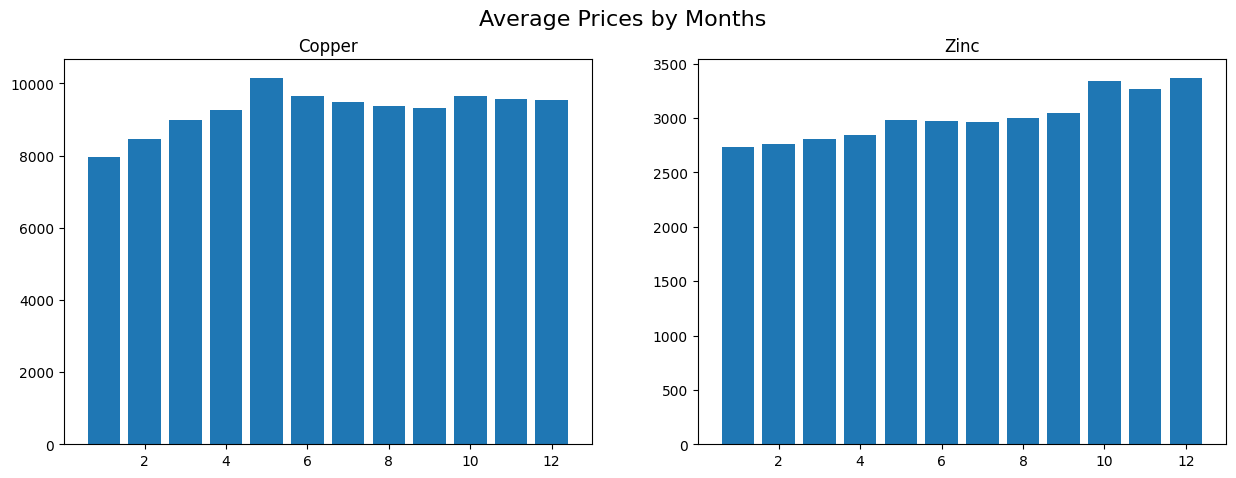

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.suptitle('Average Prices by Months ', fontsize=16)
axs[0].bar(month_average.index, month_average["Copper"])
axs[0].set_title("Copper")
axs[1].bar(month_average.index, month_average["Zinc"])
axs[1].set_title("Zinc")
plt.show()